In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.metrics import roc_auc_score, accuracy_score

In [2]:
# Create Dataset
X, y = make_circles(n_samples=300, factor=0.5, noise=0.15, random_state=50)
df = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])
df["Label"] = y
# To make the seperation difficult, noise is increased.

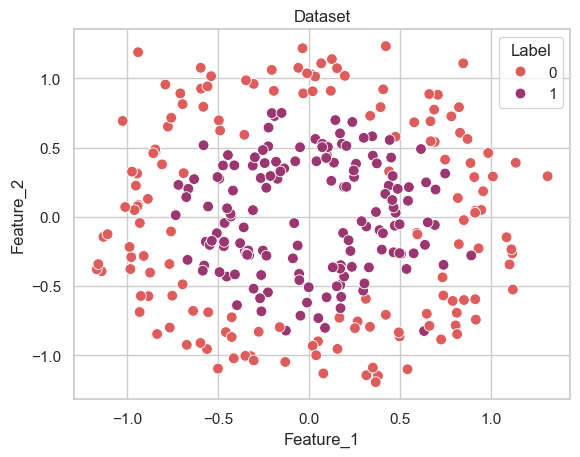

In [3]:
# Visualize Dataset
sns.set(style="whitegrid")
sns.scatterplot(data=df, x="Feature_1", y="Feature_2", hue="Label", palette="flare", s=60)
plt.title("Dataset")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.show()

In [4]:
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

X_train = pd.DataFrame(X_train, columns=['Feature_1', 'Feature_2'])
X_test = pd.DataFrame(X_test, columns=['Feature_1', 'Feature_2'])

In [5]:
# Create the linear SVC model
svc = SVC(C=1, kernel='linear')

# Fit the data
svc.fit(X_train, y_train)

# Make some predictions
y_pred = svc.predict(X_test)

# Calculate the ROC - AUC and Accuracy scores
print('ROC-AUC Score: {0:0.2f}'.format(roc_auc_score(y_test, y_pred)))

y_pred = svc.predict(X_test)
print('Accuracy: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))

# Number of Misclassifications
print(f"Number of correctly classified points: {(y_test == y_pred).sum()}")
print(f"Number of misclassified points: {(y_test != y_pred).sum()}")

# Margin Size
w = svc.coef_[0]
margin = 2 / np.linalg.norm(w)
print(f"Margin size: {margin:.2f}")

ROC-AUC Score: 0.50
Accuracy: 0.45
Number of correctly classified points: 27
Number of misclassified points: 33
Margin size: 2403.63


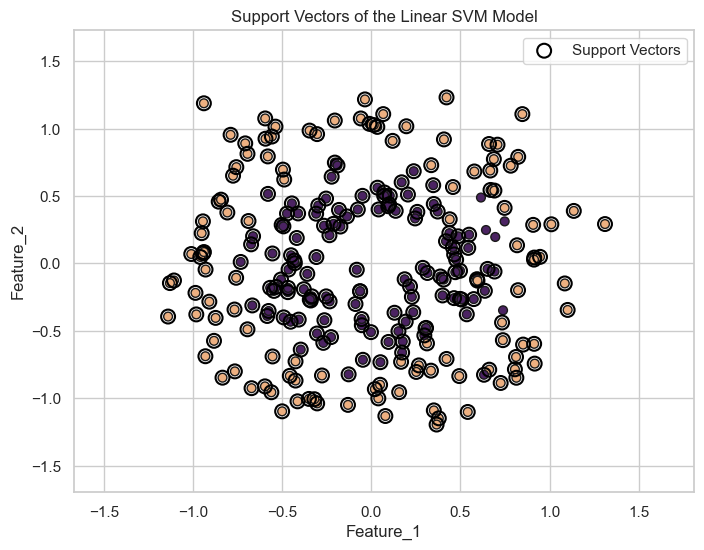

In [6]:
# Show Support Vectors of the linear model
# Create Grid
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 500), np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 500))

grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=["Feature_1", "Feature_2"])

Z = svc.decision_function(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.scatter(X_train["Feature_1"], X_train["Feature_2"], c=y_train, cmap="flare", edgecolors='k', s=40)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='black', linewidths=1.5, label="Support Vectors")
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.title("Support Vectors of the Linear SVM Model")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Create the non-linear SVC model
svc2 = SVC(C=1, kernel='rbf')

# Fit the data to the new model
svc2.fit(X_train, y_train)

# Make some predictions
y_pred2 = svc2.predict(X_test)

# Calculate the ROC - AUC and Accuracy scores
print('ROC-AUC Score: {0:0.2f}'.format(roc_auc_score(y_test, y_pred2)))
print('Accuracy: {0:0.2f}'.format(accuracy_score(y_test, y_pred2)))

# Number of Misclassifications
print(f"Number of correctly classified points: {(y_test == y_pred2).sum()}")
print(f"Number of misclassified points: {(y_test != y_pred2).sum()}")

ROC-AUC Score: 0.95
Accuracy: 0.95
Number of correctly classified points: 57
Number of misclassified points: 3


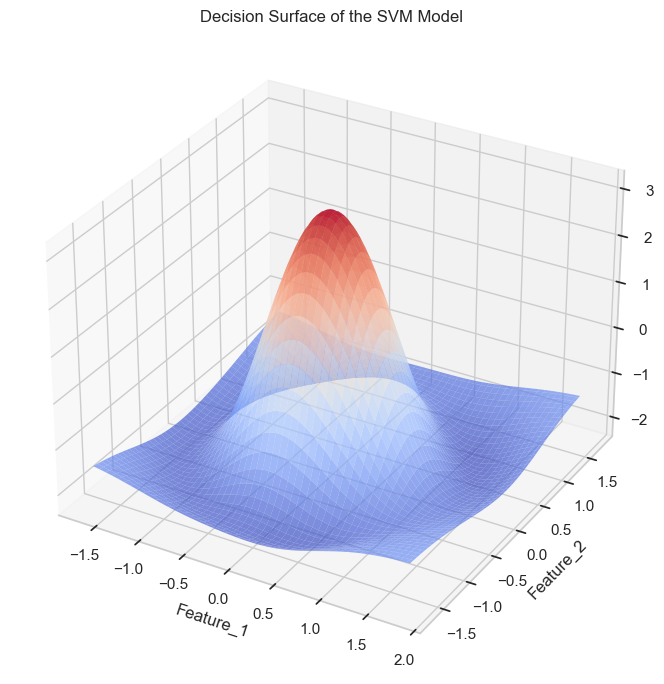

In [8]:
# Plot the decision surface of the SVM model
# Create Grid
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100), np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 100))
grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=["Feature_1", "Feature_2"])

# Decision Function
Z = svc2.decision_function(grid)
Z = Z.reshape(xx.shape)

# Plot 3D Surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm, alpha=0.7, edgecolor='none')
ax.set_xlabel('Feature_1')
ax.set_ylabel('Feature_2')
ax.set_title('Decision Surface of the SVM Model')
plt.tight_layout()
plt.show()

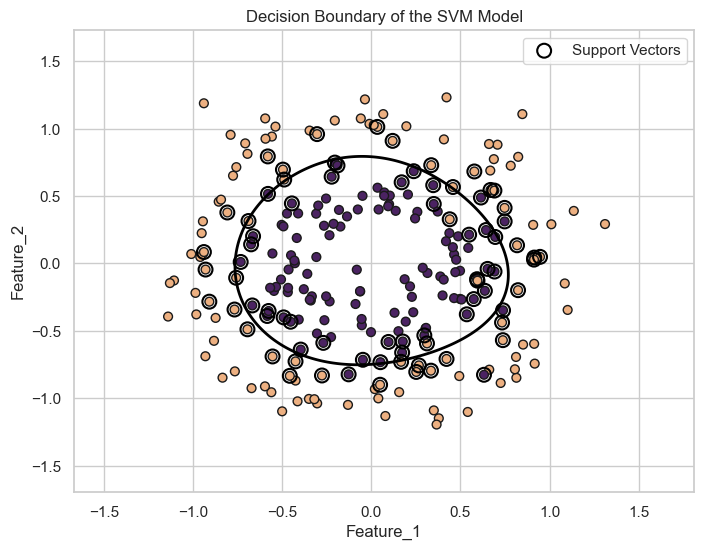

In [9]:
# Show Decision Boundary of the non-linear model 
# Create Grid
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 500), np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 500))

grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=["Feature_1", "Feature_2"])

Z = svc2.decision_function(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.scatter(X_train["Feature_1"], X_train["Feature_2"], c=y_train, cmap="flare", edgecolors='k', s=40)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(svc2.support_vectors_[:, 0], svc2.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='black', linewidths=1.5, label="Support Vectors")
plt.title("Decision Boundary of the SVM Model")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.legend()
plt.grid(True)
plt.show()